<a href="https://colab.research.google.com/github/AlvinAditiya117/PCVK25_3F_04/blob/main/Week3_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alvin Aditiya 2341720020 3F 04**

#**D1. Operasi Citra Sederhana**

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Tranformasi Linier Brightness**

Masukkan nilai kecerahan: 50


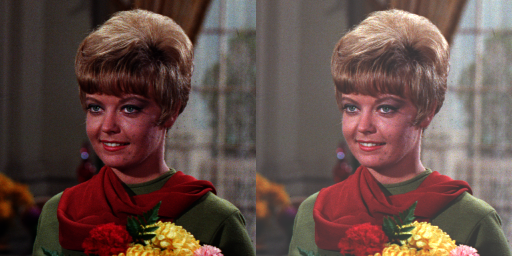

In [4]:

brightness = int(input('Masukkan nilai kecerahan: '))

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(int(original[y, x, c]) + brightness, 0, 255)

# Alternatif simple tanpa loop (lebih cepat):
# brightness_image = cv.convertScaleAbs(original, alpha=1, beta=brightness)


final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)


#**TUGAS PRAKTIKUM D1**

Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
*Gunakan Gambar KTM

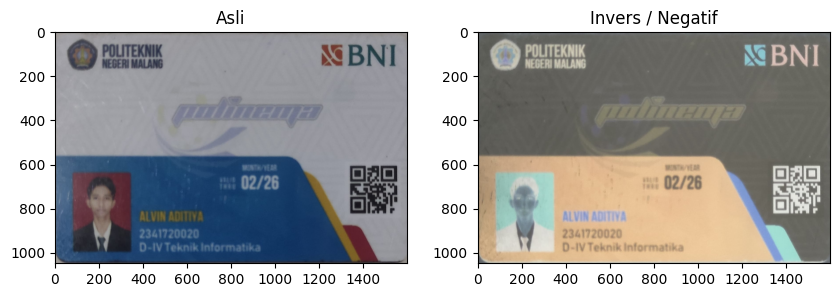

In [7]:
path = "/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/KTM.jpg"

img = cv2.imread(path)

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tampilkan gambar asli
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(imgRGB)
plt.title("Asli")

# Buat invers (negatif)
img_invers = cv2.bitwise_not(imgRGB)

# Tampilkan gambar invers
plt.subplot(1,2,2)
plt.imshow(img_invers)
plt.title("Invers / Negatif")

plt.show()


Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


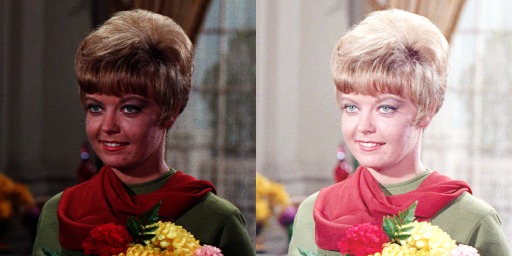

In [10]:
print(" Mengubah tingkat kecerahan citra dengan Transformasi Log ")
print("----------------------------------------------------------")

# Input nilai brightness
brightness = int(input("Masukkan nilai kecerahan: "))

# Baca gambar
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/female.tiff')
img_float = img.astype(np.float32)

# Transformasi log dengan faktor brightness
log_image = brightness * np.log(1 + img_float)

# Normalisasi ke [0,255]
log_image = np.clip(log_image, 0, 255).astype(np.uint8)

# Gabungkan hasil
final_frame = cv.hconcat([img, log_image])

cv2_imshow(final_frame)


Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
Gunakan Gambar KTM

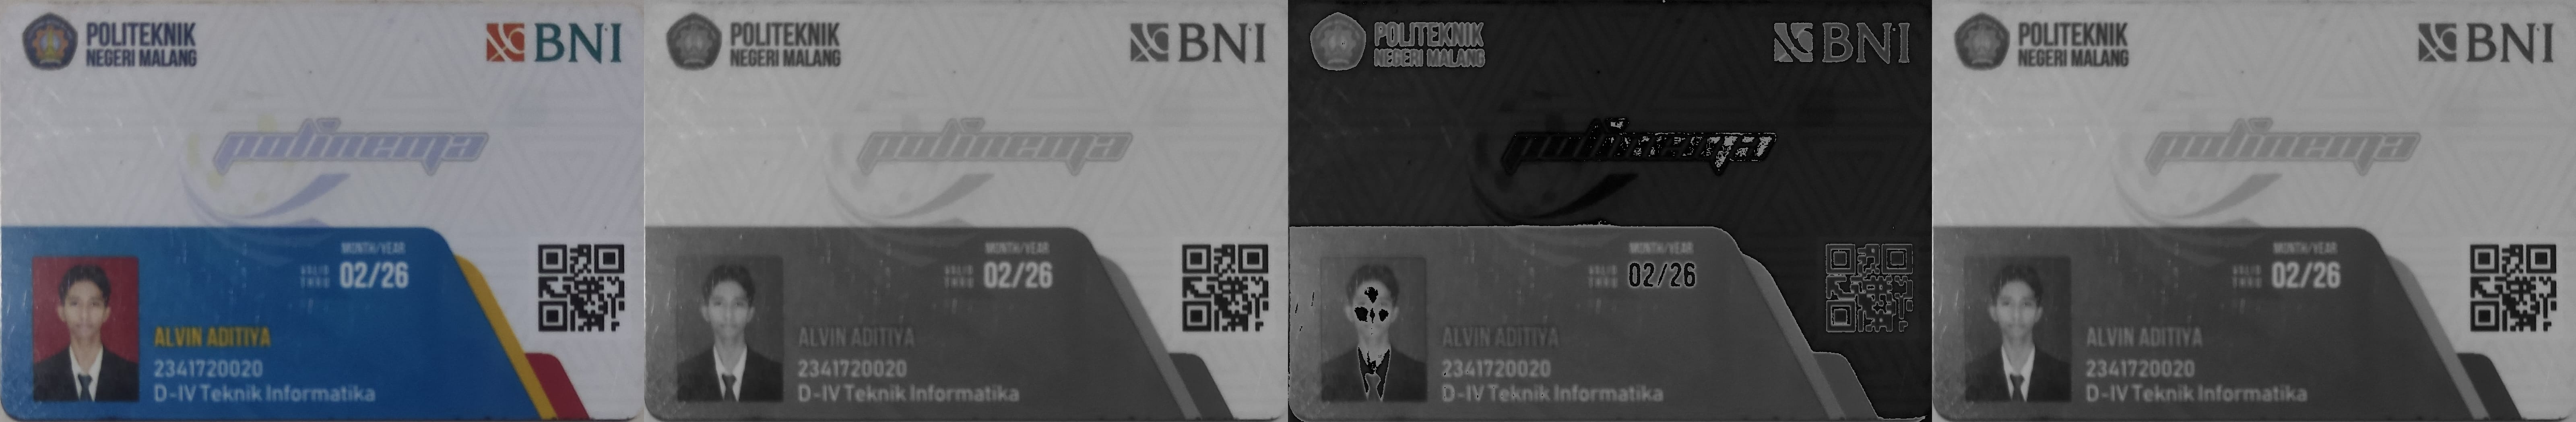

In [12]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/KTM.jpg')
b, g, r = cv.split(img)

# 1. Grayscale Averaging
gray_avg = ((r.astype(np.float32) + g.astype(np.float32) + b.astype(np.float32)) / 3).astype(np.uint8)

# 2. Grayscale Lightness
gray_lightness = ((np.maximum(np.maximum(r, g), b) + np.minimum(np.minimum(r, g), b)) / 2).astype(np.uint8)

# 3. Grayscale Luminance (persepsi visual)
gray_luminance = (0.21*r + 0.72*g + 0.07*b).astype(np.uint8)

# Gabungkan semua hasil
final_frame = cv.hconcat([img, cv.merge([gray_avg, gray_avg, gray_avg]),
                          cv.merge([gray_lightness, gray_lightness, gray_lightness]),
                          cv.merge([gray_luminance, gray_luminance, gray_luminance])])

# Tampilkan hasil
cv2_imshow(final_frame)


Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

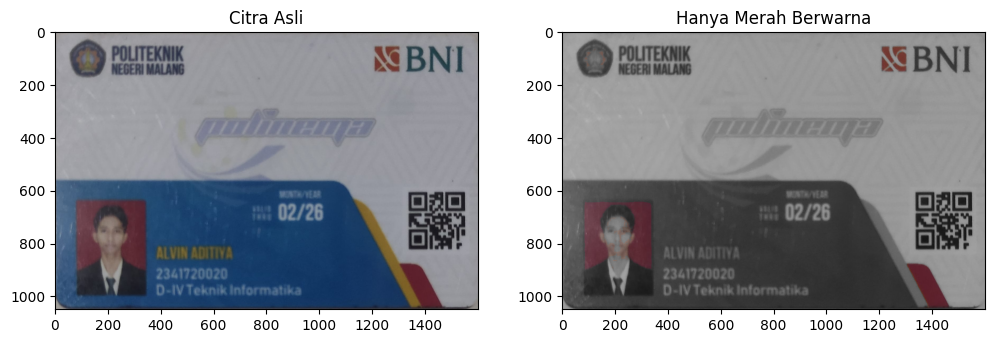

In [14]:
path = "/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/KTM.jpg"
img = cv.imread(path)

if img is None:
    print("Error: Gagal load gambar. Cek path atau nama file.")
else:
    # Konversi BGR ke RGB untuk ditampilkan
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Konversi ke HSV
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # Rentang warna merah (dua sisi hue)
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    # Gabungkan kedua mask
    mask1 = cv.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv.inRange(hsv, lower_red2, upper_red2)
    mask = cv.bitwise_or(mask1, mask2)

    # Simpan bagian merah
    color_part = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

    # Citra grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_rgb = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

    # Gabungkan: merah tetap, lain grayscale
    final = np.where(mask[:,:,None].astype(bool), color_part, gray_rgb)

    # --- Tampilkan hasil ---
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.imshow(imgRGB)
    plt.title("Citra Asli")

    plt.subplot(1,2,2)
    plt.imshow(final)
    plt.title("Hanya Merah Berwarna")

    plt.show()
